## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
from tensorflow import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0, 0.3, 0.6, 0.9, 1]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    mom_name_tag = "mom%s-" % str(momentum)
    results[mom_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.000000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

Epoch 48/50
50000/50000 [==============================] - 19s 371us/sample - loss: 1.2502 - accuracy: 0.5628 - val_loss: 1.3537 - val_accuracy: 0.5179
Epoch 49/50
50000/50000 [==============================] - 17s 347us/sample - loss: 1.2450 - accuracy: 0.5636 - val_loss: 1.4850 - val_accuracy: 0.4760
Epoch 50/50
50000/50000 [==============================] - 15s 305us/sample - loss: 1.2406 - accuracy: 0.5658 - val_loss: 1.3954 - val_accuracy: 0.4989
Experiment with LR = 0.300000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________

Epoch 45/50
50000/50000 [==============================] - 14s 271us/sample - loss: 1.1857 - accuracy: 0.5840 - val_loss: 1.5413 - val_accuracy: 0.4630
Epoch 46/50
50000/50000 [==============================] - 14s 273us/sample - loss: 1.1787 - accuracy: 0.5857 - val_loss: 1.3670 - val_accuracy: 0.5101
Epoch 47/50
50000/50000 [==============================] - 14s 271us/sample - loss: 1.1635 - accuracy: 0.5930 - val_loss: 1.3739 - val_accuracy: 0.5139
Epoch 48/50
50000/50000 [==============================] - 14s 276us/sample - loss: 1.1632 - accuracy: 0.5930 - val_loss: 1.6325 - val_accuracy: 0.4514
Epoch 49/50
50000/50000 [==============================] - 13s 264us/sample - loss: 1.1492 - accuracy: 0.5993 - val_loss: 1.4169 - val_accuracy: 0.4901
Epoch 50/50
50000/50000 [==============================] - 13s 270us/sample - loss: 1.1445 - accuracy: 0.5977 - val_loss: 1.3225 - val_accuracy: 0.5296
Experiment with LR = 0.600000
Model: "model"
___________________________________________

Epoch 42/50
50000/50000 [==============================] - 21s 411us/sample - loss: 1.0650 - accuracy: 0.6250 - val_loss: 1.3855 - val_accuracy: 0.5261
Epoch 43/50
50000/50000 [==============================] - 17s 339us/sample - loss: 1.0406 - accuracy: 0.6334 - val_loss: 1.3664 - val_accuracy: 0.5239
Epoch 44/50
50000/50000 [==============================] - 18s 366us/sample - loss: 1.0342 - accuracy: 0.6375 - val_loss: 1.7461 - val_accuracy: 0.4415
Epoch 45/50
50000/50000 [==============================] - 14s 285us/sample - loss: 1.0205 - accuracy: 0.6409 - val_loss: 1.4385 - val_accuracy: 0.5102
Epoch 46/50
50000/50000 [==============================] - 15s 291us/sample - loss: 1.0088 - accuracy: 0.6461 - val_loss: 1.5534 - val_accuracy: 0.4880
Epoch 47/50
50000/50000 [==============================] - 14s 273us/sample - loss: 1.0006 - accuracy: 0.6502 - val_loss: 1.4523 - val_accuracy: 0.5005
Epoch 48/50
50000/50000 [==============================] - 15s 291us/sample - loss: 0.98

Epoch 39/50
50000/50000 [==============================] - 8s 159us/sample - loss: 0.6244 - accuracy: 0.7776 - val_loss: 1.5904 - val_accuracy: 0.5252
Epoch 40/50
50000/50000 [==============================] - 8s 157us/sample - loss: 0.6024 - accuracy: 0.7863 - val_loss: 1.7555 - val_accuracy: 0.5164
Epoch 41/50
50000/50000 [==============================] - 8s 170us/sample - loss: 0.5805 - accuracy: 0.7927 - val_loss: 1.8630 - val_accuracy: 0.5048
Epoch 42/50
50000/50000 [==============================] - 11s 214us/sample - loss: 0.5693 - accuracy: 0.7964 - val_loss: 1.7282 - val_accuracy: 0.5315
Epoch 43/50
50000/50000 [==============================] - 10s 202us/sample - loss: 0.5416 - accuracy: 0.8088 - val_loss: 1.7145 - val_accuracy: 0.5297
Epoch 44/50
50000/50000 [==============================] - 11s 216us/sample - loss: 0.5181 - accuracy: 0.8164 - val_loss: 1.7230 - val_accuracy: 0.5253
Epoch 45/50
50000/50000 [==============================] - 9s 186us/sample - loss: 0.5083 -

50000/50000 [==============================] - 8s 158us/sample - loss: 2.3104 - accuracy: 0.0973 - val_loss: 2.3099 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 9s 187us/sample - loss: 2.3099 - accuracy: 0.0984 - val_loss: 2.3095 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 9s 187us/sample - loss: 2.3100 - accuracy: 0.1001 - val_loss: 2.3115 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 8s 168us/sample - loss: 2.3076 - accuracy: 0.0994 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 10s 196us/sample - loss: 2.3070 - accuracy: 0.1025 - val_loss: 2.3081 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 9s 187us/sample - loss: 2.3086 - accuracy: 0.1000 - val_loss: 2.3055 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 16s 317us/sample - loss: 2.3088 - accuracy: 0.

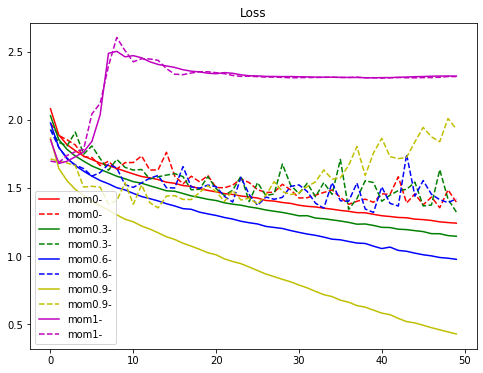

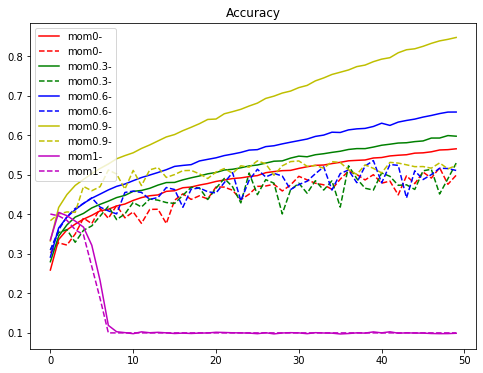

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()